In [73]:
import numpy as np # A package for scientific computing in Python, providing support for arrays and matrices, as well as a wide range of mathematical operations
import pandas as pd # A library for data manipulation and analysis, providing data structures like DataFrames and Series to work with tabular data.
import seaborn as sns # A data visualization library based on Matplotlib that provides a high-level interface for creating informative and attractive statistical graphics.
import matplotlib.pyplot as plt # A plotting library for creating static, interactive, and animated visualizations in Python.
import plotly.graph_objects as go # A package for creating interactive and dynamic visualizations in Python, including graphs, charts, and maps.
# import scikitplot as sklpt
import kaleido # A package for exporting static images of visualizations created with Plotly or Matplotlib.
import warnings # A library for handling warnings and exceptions in Python.
warnings.filterwarnings("ignore")


from IPython.display import display # A module that provides functions for displaying various types of data within the IPython environment.
from matplotlib import colormaps # A module that provides a collection of color maps for use in visualizations.
from plotly.subplots import make_subplots

# scipy: A library for scientific computing and statistics in Python, including tools for optimization, integration, interpolation, and more.
import scipy.stats as sts
from scipy.stats import spearmanr, chi2_contingency
from scipy.stats import normaltest, ttest_ind
from scipy.stats import shapiro

# sklearn: A package that provides a wide range of machine learning algorithms and tools for data preprocessing, model selection, evaluation, and more.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.metrics import mean_squared_error, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, f_classif



from itertools import combinations

In [2]:
data = pd.read_csv("../stroke_dataset/healthcare-dataset-stroke-data.csv", index_col=0 #sets the first column of the CSV file as the index of the dataframe 
                   , dtype = {
        'id' : int,
        'gender' : 'category', # pd.CategoricalDtype(categories=["Male", "Female"], ordered=False),
        'age' : float,
        'hypertension' : bool,
        'heart_disease' : bool,
        'ever_married' : 'category',
        'work_type' : 'category', # pd.CategoricalDtype(categories=["Private", "Self-employed", "Govt_job"], ordered=False),
        'Residence_type' : 'category', # pd.CategoricalDtype(categories=["Urban", "Rural"], ordered=False),
        'avg_glucose_level' : float,
        'bmi' : float,
        'smoking_status' : 'category', # pd.CategoricalDtype(categories=["never smoked", "smokes", "formerly smoked", "Unknown"], ordered=False),
        'stroke' : bool
    },
)


In [3]:
#data = pd.read_csv("../stroke_dataset/healthcare-dataset-stroke-data.csv", index_col=0 #sets the first column of the CSV file as the index of the dataframe
#                   )

Tutorial 2

In [4]:
print(data.dtypes)
print("-------------------------")
print('shape:', data.shape)
print("-------------------------")
print(data.head(10))
print("-------------------------")
print('missing values: ', data.isna().sum())
print("-------------------------")
print(data.describe())
print("-------------------------")
# print('data types: ', data.dtypes)


gender               category
age                   float64
hypertension             bool
heart_disease            bool
ever_married         category
work_type            category
Residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke                   bool
dtype: object
-------------------------
shape: (5110, 11)
-------------------------
       gender   age  hypertension  heart_disease ever_married      work_type  \
id                                                                             
9046     Male  67.0         False           True          Yes        Private   
51676  Female  61.0         False          False          Yes  Self-employed   
31112    Male  80.0         False           True          Yes        Private   
60182  Female  49.0         False          False          Yes        Private   
1665   Female  79.0          True          False          Yes  Self-employed   
56669    Male  81.0       

In [5]:
#unique values as overview
category_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']

for column in category_columns:
    unique_categories = data[column].unique()
    print(f"Unique categories in {column}: {unique_categories}")

Unique categories in gender: ['Male', 'Female', 'Other']
Categories (3, object): ['Female', 'Male', 'Other']
Unique categories in hypertension: [False  True]
Unique categories in heart_disease: [ True False]
Unique categories in ever_married: ['Yes', 'No']
Categories (2, object): ['No', 'Yes']
Unique categories in work_type: ['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked']
Categories (5, object): ['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children']
Unique categories in Residence_type: ['Urban', 'Rural']
Categories (2, object): ['Rural', 'Urban']
Unique categories in smoking_status: ['formerly smoked', 'never smoked', 'smokes', 'Unknown']
Categories (4, object): ['Unknown', 'formerly smoked', 'never smoked', 'smokes']
Unique categories in stroke: [ True False]


In [6]:

# gender
print(data['gender'].value_counts())
print('------------------')

# age
print('min age: ', data['age'].min())
print('max age: ', data['age'].max())
print('mean age: ', data['age'].mean())
print('median age: ', data['age'].median())
print('------------------')

# hypertension
print(data['hypertension'].value_counts())
print('------------------')

# heart_disease
print(data['heart_disease'].value_counts())
print('------------------')

# ever_married
print(data['ever_married'].value_counts())
print('------------------')

# work_type
print(data['work_type'].value_counts())
print('------------------')

# Residence_type
print(data['Residence_type'].value_counts())
print('------------------')

# avg_glucose_level
print('min avg_glucose_level: ', data['avg_glucose_level'].min())
print('max avg_glucose_level: ', data['avg_glucose_level'].max())
print('mean avg_glucose_level: ', data['avg_glucose_level'].mean())
print('median avg_glucose_level: ', data['avg_glucose_level'].median())
print('------------------')

# bmi
print('min bmi: ', data['bmi'].min())
print('max bmi: ', data['bmi'].max())
print('mean bmi: ', data['bmi'].mean())
print('median bmi: ', data['bmi'].median())
print('------------------')

# smoking_status
print(data['smoking_status'].value_counts())
print('------------------')

# stroke 
print(data['stroke'].value_counts())
print('------------------')

# Use pairplot to visualize the relationships between variables
# sns.pairplot(data, hue='stroke') bringt nüt wüu mir wei immer relationship with stroke

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
------------------
min age:  0.08
max age:  82.0
mean age:  43.226614481409
median age:  45.0
------------------
False    4612
True      498
Name: hypertension, dtype: int64
------------------
False    4834
True      276
Name: heart_disease, dtype: int64
------------------
Yes    3353
No     1757
Name: ever_married, dtype: int64
------------------
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
------------------
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
------------------
min avg_glucose_level:  55.12
max avg_glucose_level:  271.74
mean avg_glucose_level:  106.1476771037182
median avg_glucose_level:  91.88499999999999
------------------
min bmi:  10.3
max bmi:  97.6
mean bmi:  28.893236911794666
median bmi:  28.1
------------------
never smoked       1892
Unknown            1544
formerly smoked     885


Tutorial 3

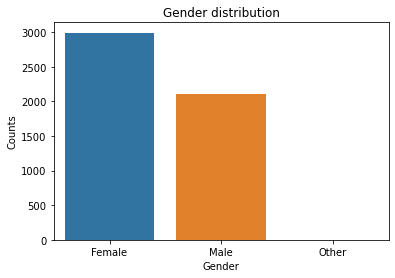

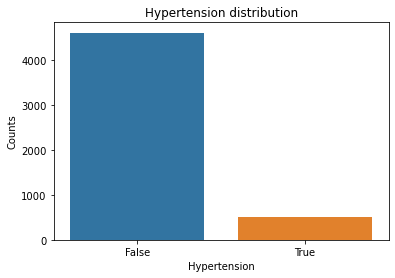

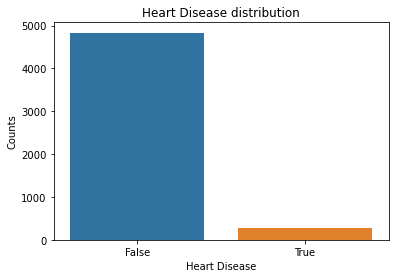

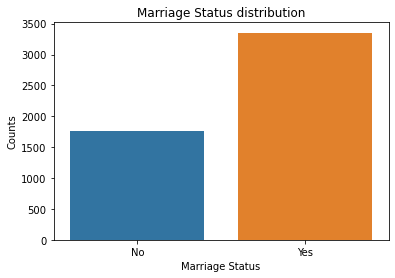

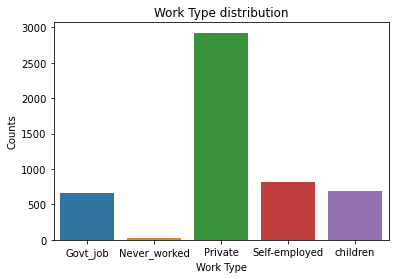

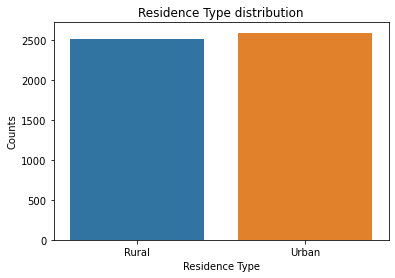

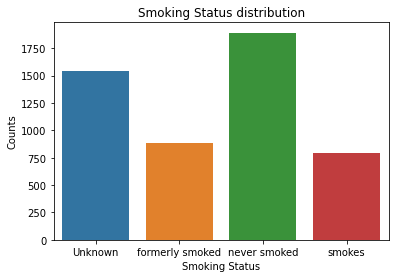

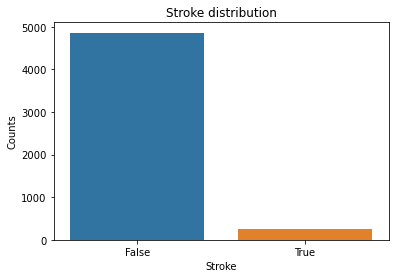

In [7]:
# Subplot for all the distributions
#fig_distributions = plt.subplot(4, 2, figsize = (12, 12))
plt.show()

# gender
fig_gender = sns.countplot(data, x = 'gender')
fig_gender.set(xlabel = 'Gender', ylabel = 'Counts', title = 'Gender distribution')
plt.show()

# hypertension
fig_hypertension = sns.countplot(data, x = 'hypertension')
fig_hypertension.set(xlabel = 'Hypertension', ylabel = 'Counts', title = 'Hypertension distribution')
plt.show()

# heart_disease
fig_heart_disease = sns.countplot(data, x = 'heart_disease')
fig_heart_disease.set(xlabel = 'Heart Disease', ylabel = 'Counts', title = 'Heart Disease distribution')
plt.show()

# ever_married
fig_ever_married = sns.countplot(data, x = 'ever_married')
fig_ever_married.set(xlabel = 'Marriage Status', ylabel = 'Counts', title = 'Marriage Status distribution')
plt.show()

# work_type
fig_work_type = sns.countplot(data, x = 'work_type')
fig_work_type.set(xlabel = 'Work Type', ylabel = 'Counts', title = 'Work Type distribution')
plt.show()

# Residence_type
fig_Residence_type = sns.countplot(data, x = 'Residence_type')
fig_Residence_type.set(xlabel = 'Residence Type', ylabel = 'Counts', title = 'Residence Type distribution')
plt.show()

# smoking_status
fig_smoking_status = sns.countplot(data, x = 'smoking_status')
fig_smoking_status.set(xlabel = 'Smoking Status', ylabel = 'Counts', title = 'Smoking Status distribution')
plt.show()

# stroke
fig_stroke = sns.countplot(data, x = 'stroke')
fig_stroke.set(xlabel = 'Stroke', ylabel = 'Counts', title = 'Stroke distribution')
plt.show()


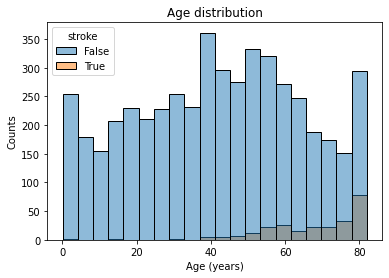

[Text(0.5, 0, 'Stroke'),
 Text(0, 0.5, 'Age (years)'),
 Text(0.5, 1.0, 'Age split by Stroke')]

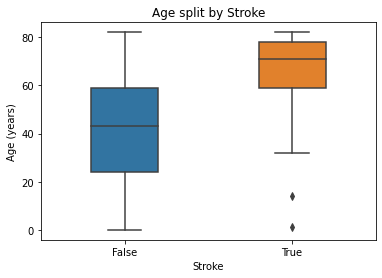

In [8]:
# age
fig_age= sns.histplot(data, x = 'age', hue = 'stroke')
fig_age.set(xlabel = 'Age (years)', ylabel = 'Counts', title = 'Age distribution')
plt.show()

fig_age_stroke = sns.boxplot(data, x = 'stroke', y ='age',width=0.4)
fig_age_stroke.set(xlabel = 'Stroke', ylabel = 'Age (years)', title = 'Age split by Stroke')



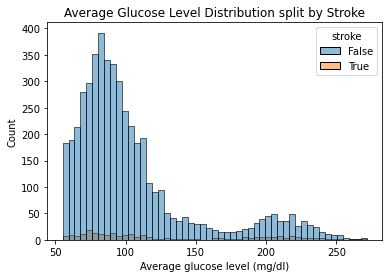

[Text(0.5, 0, 'Stroke'),
 Text(0, 0.5, 'Average glucose level (mg/dl)'),
 Text(0.5, 1.0, 'Average Glucose Level split by Stroke')]

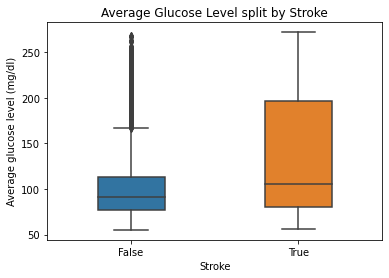

In [9]:
# avg_glucose_level
fig_avg_glucose_level = sns.histplot(data, x = 'avg_glucose_level', hue = 'stroke')
fig_avg_glucose_level.set(xlabel = 'Average glucose level (mg/dl)', ylabel = 'Count', title = 'Average Glucose Level Distribution split by Stroke')
plt.show()

fig_avg_glucose_level = sns.boxplot(data, x = 'stroke', y ='avg_glucose_level',width=0.4)
fig_avg_glucose_level.set(xlabel = 'Stroke', ylabel = 'Average glucose level (mg/dl)', title = 'Average Glucose Level split by Stroke')


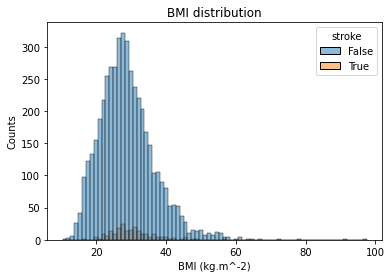

[Text(0.5, 0, 'Stroke'),
 Text(0, 0.5, 'BMI (kg.m^-2)'),
 Text(0.5, 1.0, 'BMI split by Stroke')]

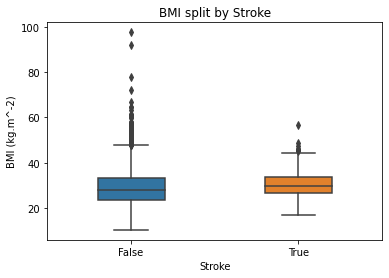

In [10]:
# bmi
fig_bmi = sns.histplot(data, x = 'bmi', hue = 'stroke')
fig_bmi.set(xlabel = 'BMI (kg.m^-2)', ylabel = 'Counts', title = 'BMI distribution')
plt.show()

fig_bmi_stroke = sns.boxplot(data, x = 'stroke', y ='bmi',width=0.4)
fig_bmi_stroke.set(xlabel = 'Stroke', ylabel = 'BMI (kg.m^-2)', title = 'BMI split by Stroke')


Tutorial 4 & 5

In [11]:
#Datenbereinigung!

In [12]:
#how many strokes
print(data["stroke"].value_counts())
print("-------------------------")
#imbalanced!-> challenges for certain machine learning algorithms, 
#as the model may be biased towards the majority class and struggle to learn patterns from the minority class.

False    4861
True      249
Name: stroke, dtype: int64
-------------------------


In [13]:
#data types conversion-> already done in beginning

In [14]:
#outlier in categorical data

#gender distribution has only one in the category other so we can delete this category
print(data.shape)
other_count = data['gender'].value_counts()['Other']
print("Count of 'Other' in the 'gender' column:", other_count)
other_indices = data[data['gender'] == 'Other'].index.tolist()
print("Indices where 'Other' occurs in the 'gender' column:", other_indices)
data = data.drop(other_indices, axis=0)
print('----------------------')
print(data.shape)


(5110, 11)
Count of 'Other' in the 'gender' column: 1
Indices where 'Other' occurs in the 'gender' column: [56156]
----------------------
(5109, 11)


In [15]:
#delete rows with missing data-> BMI
#too much to just put in mean
#alternative: mean or regression imputation, k-nearest neighbour
print(data.shape)
data.dropna(axis='index', subset=['bmi'], inplace=True)
print(data.shape)
#data.isna().sum()
#axis='index' -> rows containing missing values in the specified subset should be dropped
#inplace=True-> changes are made directly to the data DataFrame.

(5109, 11)
(4908, 11)


In [16]:
#remove outliers in continuous data-> analyzing boxplots-> not only impossible values but also max/mins because not representative for population

#bmi: highest measured are around 200 so 100 could be
print(data.shape)
print('----------------------')
filtered_data_bmi_f = data[(data['stroke'] == False) & (data['bmi'] >70)]
#print(filtered_data_bmi_f)
filtered_ids_bmi_f = filtered_data_bmi_f.index.tolist()
print("IDs that satisfy the bmi criteria without stroke:", filtered_ids_bmi_f)
data = data.drop(filtered_ids_bmi_f, axis=0)
print('----------------------')
print(data.shape)

filtered_data_bmi_t = data[(data['stroke'] == True) & (data['bmi'] >50)]
#print(filtered_data_bmi_t)
filtered_ids_bmi_t = filtered_data_bmi_t.index.tolist()
print("IDs that satisfy the bmi criteria with stroke:", filtered_ids_bmi_t)
data = data.drop(filtered_ids_bmi_t, axis=0)
print('----------------------')

#avg_glucose_level-> looks right/positive skewed, continuous values to the right-> no outliers detectable

#age: 2 outliers in the group stroke = True
print(data.shape)
print('----------------------')
filtered_data_age = data[(data['stroke'] == True) & (data['age'] < 30)]
#print(filtered_data_age)
#print('----------------------')
#num_ids = len(filtered_data)
#print(f"Number of IDs: {num_ids}")
#print('----------------------')
filtered_ids_age = filtered_data_age.index.tolist()
print("IDs that satisfy the age criteria:", filtered_ids_age)
data = data.drop(filtered_ids_age, axis=0)
print(data.shape)

(4908, 11)
----------------------
IDs that satisfy the bmi criteria without stroke: [545, 41097, 56420, 51856]
----------------------
(4904, 11)
IDs that satisfy the bmi criteria with stroke: [41069]
----------------------
(4903, 11)
----------------------
IDs that satisfy the age criteria: [49669]
(4902, 11)


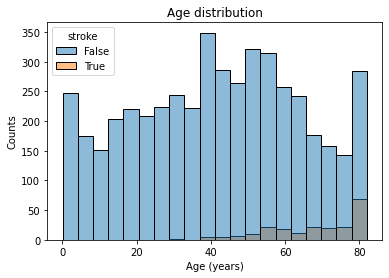

[Text(0.5, 0, 'Stroke'),
 Text(0, 0.5, 'Age (years)'),
 Text(0.5, 1.0, 'Age split by Stroke')]

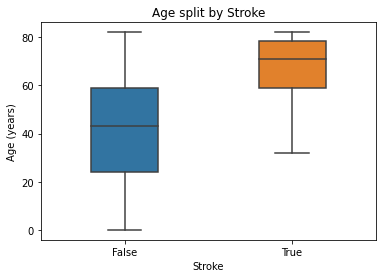

In [17]:
#do the bar plot again to see if outliers are gone
# age
fig_age= sns.histplot(data, x = 'age', hue = 'stroke')
fig_age.set(xlabel = 'Age (years)', ylabel = 'Counts', title = 'Age distribution')
plt.show()

fig_age_stroke = sns.boxplot(data, x = 'stroke', y ='age',width=0.4)
fig_age_stroke.set(xlabel = 'Stroke', ylabel = 'Age (years)', title = 'Age split by Stroke')

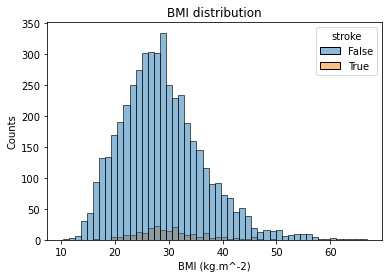

[Text(0.5, 0, 'Stroke'),
 Text(0, 0.5, 'BMI (kg.m^-2)'),
 Text(0.5, 1.0, 'BMI split by Stroke')]

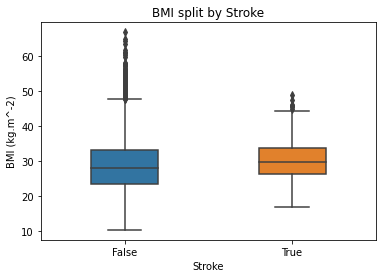

In [18]:
# bmi
#do the bar plot again to see if outliers are gone
fig_bmi = sns.histplot(data, x = 'bmi', hue = 'stroke')
fig_bmi.set(xlabel = 'BMI (kg.m^-2)', ylabel = 'Counts', title = 'BMI distribution')
plt.show()

fig_bmi_stroke = sns.boxplot(data, x = 'stroke', y ='bmi',width=0.4)
fig_bmi_stroke.set(xlabel = 'Stroke', ylabel = 'BMI (kg.m^-2)', title = 'BMI split by Stroke')


In [19]:
#Check if continuous variables are normally distributed
#looking at the hisplots in Tutorial 3
#Perform Shapiro-Wilk test for normality
#P value larger than 0.05 -> normal distribution is assumed!  
columns = data.select_dtypes(include=[np.number]).columns
for var in columns:
    result = sts.shapiro(data[var].dropna())
    print(f"Shapiro-Wilk for {var}, p-value: {result.pvalue:.10f}")
#they are all NOT normally distributed-> take that into account later with alternative statistical techniques or distributions

Shapiro-Wilk for age, p-value: 0.0000000000
Shapiro-Wilk for avg_glucose_level, p-value: 0.0000000000
Shapiro-Wilk for bmi, p-value: 0.0000000000


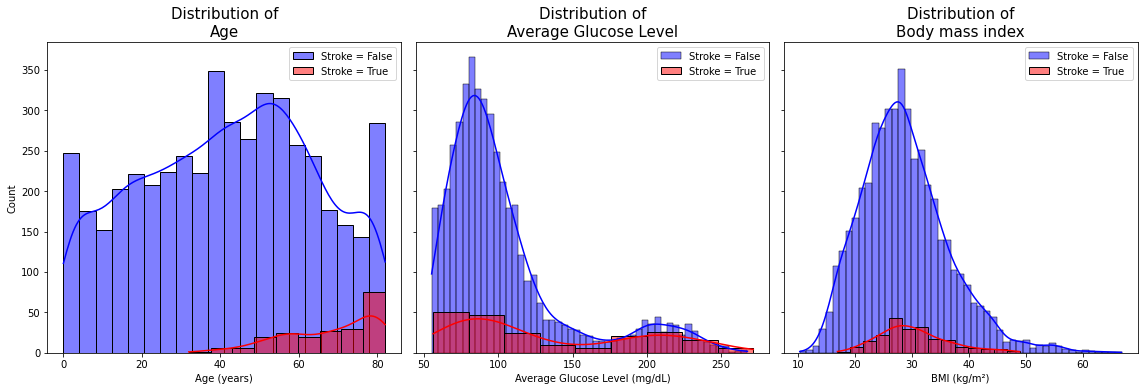

In [20]:
#plot the distributions of bmi, average glucose level and age
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()

fig, axs = plt.subplots(nrows=2, ncols=3, sharey=True, figsize=(16, 10))
titles = {
    "age": "Age",
    "bmi": "Body mass index",
    "avg_glucose_level": "Average Glucose Level",
}
xlabels = {
    "age": "Age (years)",
    "bmi": "BMI (kg/m²)",
    "avg_glucose_level": "Average Glucose Level (mg/dL)",
}

for i, ax in enumerate(axs.flatten()):
    if i < len(numeric_columns):
        column = numeric_columns[i]
        sns.histplot(data=data[data['stroke'] == False], x=column, kde=True, ax=ax, color='blue', label='Stroke = False')
        sns.histplot(data=data[data['stroke'] == True], x=column, kde=True, ax=ax, color='red', label='Stroke = True')
        ax.set_title(f"Distribution of\n{titles[column]}", fontsize=15)
        ax.set_xlabel(xlabels[column], fontsize=10)
        ax.legend()
        if i != 0 and i != 3:
            ax.set_ylabel(None)
    else:
        fig.delaxes(ax)

fig.tight_layout()
plt.show()


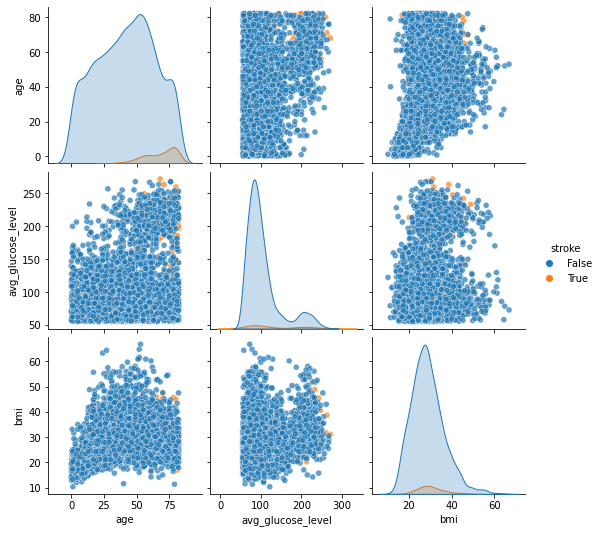

In [21]:
#correlation between variables
vars = data.select_dtypes(include=[np.number]).columns.tolist()
plot = sns.pairplot(data=data, vars=vars, hue="stroke", plot_kws={"alpha": 0.7, "marker": "o"})#plot_kws makes dots a little transparent
plot._legend.set_bbox_to_anchor((1, 0.5))  # Adjust legend position
plt.show()



In [22]:
#quantify correlation between variable pairs
for comb in combinations(vars, 2):
    print(f" {comb[0]} - {comb[1]}")
    print(f"\tSpearman Rank Correlation {sts.spearmanr(data[comb[0]], data[comb[1]]).statistic: .3f}, p-value {sts.spearmanr(data[comb[0]], data[comb[1]]).pvalue: .3f}")
    print(f"\tPearson Rank Correlation  {sts.pearsonr(data[comb[0]], data[comb[1]]).statistic: .3f}, p-value {sts.pearsonr(data[comb[0]], data[comb[1]]).pvalue: .3f}")
# Spearman:     is the Pearson’s correlation coefficient applied to the rank of the data, no absolute values but only relative ranks 
    #-1: perfect negative correlation (x increases, y decreases) 
    #0: no association (unrelated variables)  
    #+1: perfect positive correlation (x increases, y increases)   
#Pearson:     strength of the linear relationship between two variables (x, y) that come from interval or ratio level without outliers 
    #-1: perfect negative correlation (x increases, y decreases) 
    #0: no association (unrelated variables) 
    #+1: perfect positive correlation (x increases, y increases) 
    


 age - avg_glucose_level
	Spearman Rank Correlation  0.140, p-value  0.000
	Pearson Rank Correlation   0.236, p-value  0.000
 age - bmi
	Spearman Rank Correlation  0.377, p-value  0.000
	Pearson Rank Correlation   0.345, p-value  0.000
 avg_glucose_level - bmi
	Spearman Rank Correlation  0.116, p-value  0.000
	Pearson Rank Correlation   0.180, p-value  0.000


In [23]:
#probably Kendall's to compare input variable= numerical and output= categorical(stroke)  
#not ANOVA because it is not normally distributed

In [24]:
#statistical testing
#categorical variables, for example , and start with a contingency table by outcome.
#gender
gender_contingency = pd.crosstab(data["gender"],data["stroke"])
print(gender_contingency)
print('-----------------')
#smoking_status
smoking_status_contingency = pd.crosstab(data["smoking_status"],data["stroke"])
print(smoking_status_contingency)
print('-----------------')
#ever_married
ever_married_contingency = pd.crosstab(data["ever_married"],data["stroke"])
print(ever_married_contingency)
print('-----------------')
#work_type
work_type_contingency = pd.crosstab(data["work_type"],data["stroke"])
print(work_type_contingency)
print('-----------------')
#Residence_type
Residence_type_contingency = pd.crosstab(data["Residence_type"],data["stroke"])
print(Residence_type_contingency)
print('-----------------')

stroke  False  True 
gender              
Female   2776    118
Male     1919     89
-----------------
stroke           False  True 
smoking_status               
Unknown           1453     28
formerly smoked    779     57
never smoked      1766     83
smokes             697     39
-----------------
stroke        False  True 
ever_married              
No             1679     22
Yes            3016    185
-----------------
stroke         False  True 
work_type                  
Govt_job         602     28
Never_worked      22      0
Private         2679    126
Self-employed    722     53
children         670      0
-----------------
stroke          False  True 
Residence_type              
Rural            2315     98
Urban            2380    109
-----------------


In [25]:
#such a contingency table provides the basis for a chi squared test.
chi2_result_gender = sts.chi2_contingency(gender_contingency)
print(chi2_result_gender)
chi2_result_smoking_status = sts.chi2_contingency(smoking_status_contingency)
print(chi2_result_smoking_status)
chi2_result_ever_married = sts.chi2_contingency(ever_married_contingency)
print(chi2_result_ever_married)
chi2_result_work_type = sts.chi2_contingency(work_type_contingency)
print(chi2_result_work_type)
chi2_result_Residence_type = sts.chi2_contingency(Residence_type_contingency)
print(chi2_result_Residence_type)

Chi2ContingencyResult(statistic=0.2865911573982018, pvalue=0.5924133238434243, dof=1, expected_freq=array([[2771.79314565,  122.20685435],
       [1923.20685435,   84.79314565]]))
Chi2ContingencyResult(statistic=36.271530324950845, pvalue=6.56105592195177e-08, dof=3, expected_freq=array([[1418.46083231,   62.53916769],
       [ 800.69767442,   35.30232558],
       [1770.92105263,   78.07894737],
       [ 704.92044064,   31.07955936]]))
Chi2ContingencyResult(statistic=54.166786979572265, pvalue=1.841737023646664e-13, dof=1, expected_freq=array([[1629.17074663,   71.82925337],
       [3065.82925337,  135.17074663]]))
Chi2ContingencyResult(statistic=44.20200861347519, pvalue=5.824875485093221e-09, dof=4, expected_freq=array([[6.03396573e+02, 2.66034272e+01],
       [2.10709914e+01, 9.29008568e-01],
       [2.68655141e+03, 1.18448592e+02],
       [7.42273562e+02, 3.27264382e+01],
       [6.41707466e+02, 2.82925337e+01]]))
Chi2ContingencyResult(statistic=0.23264866275138263, pvalue=0.629566

In [26]:
print('P-value of Chi-Squared-Test by gender:',chi2_result_gender.pvalue)

print('P-value of Chi-Squared-Test by smoking status:',chi2_result_smoking_status.pvalue) 
#statistically significant->smoking status is likely associated with stroke 

print('P-value of Chi-Squared-Test by marriage:',chi2_result_ever_married.pvalue)
#statistically significant->marriage is likely associated with stroke 

print('P-value of Chi-Squared-Test by type of work:',chi2_result_work_type.pvalue)
#statistically significant->type of work is likely associated with stroke 

print('P-value of Chi-Squared-Test by type of residence:',chi2_result_Residence_type.pvalue)


P-value of Chi-Squared-Test by gender: 0.5924133238434243
P-value of Chi-Squared-Test by smoking status: 6.56105592195177e-08
P-value of Chi-Squared-Test by marriage: 1.841737023646664e-13
P-value of Chi-Squared-Test by type of work: 5.824875485093221e-09
P-value of Chi-Squared-Test by type of residence: 0.6295668019422951


In [27]:
#ranksums

In [28]:
#sampling

Tutorial 6

In [29]:
# this tutorial is not relevant for the data

Tutorial 7

In [30]:
#identify features
num_cols = ["age", "avg_glucose_level", "bmi"]
cate_cols = ["gender", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "smoking_status"]
data[cate_cols] = data[cate_cols].astype('category')

In [31]:
#Perform one-hot encoding on the categorical features
#One-hot encoding creates a new binary (0/1) column for each unique value in the categorical feature
df = pd.DataFrame(data)
print("Original dataset:")
display(df)

# One-hot encodeing of just the feature stroke:  
#encoded_df = pd.get_dummies(df, columns=['stroke'], prefix='stroke', drop_first=True)
#print("\nDataset with one-hot encoding of stroke:")
#display(encoded_df)

encoded_df = pd.get_dummies(data, columns=cate_cols, prefix = cate_cols, drop_first= False)
print("\nDataset with one-hot encoding:")
display(encoded_df)

Original dataset:


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,False,True,Yes,Private,Urban,228.69,36.6,formerly smoked,True
31112,Male,80.0,False,True,Yes,Private,Rural,105.92,32.5,never smoked,True
60182,Female,49.0,False,False,Yes,Private,Urban,171.23,34.4,smokes,True
1665,Female,79.0,True,False,Yes,Self-employed,Rural,174.12,24.0,never smoked,True
56669,Male,81.0,False,False,Yes,Private,Urban,186.21,29.0,formerly smoked,True
...,...,...,...,...,...,...,...,...,...,...,...
14180,Female,13.0,False,False,No,children,Rural,103.08,18.6,Unknown,False
44873,Female,81.0,False,False,Yes,Self-employed,Urban,125.20,40.0,never smoked,False
19723,Female,35.0,False,False,Yes,Self-employed,Rural,82.99,30.6,never smoked,False



Dataset with one-hot encoding:


,age,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,hypertension_False,hypertension_True,heart_disease_False,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,,,,,,,,,,,,,,,,,,,,,
9046,67.0,228.69,36.6,True,0,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
31112,80.0,105.92,32.5,True,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
60182,49.0,171.23,34.4,True,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
1665,79.0,174.12,24.0,True,1,0,0,0,1,1,...,0,0,1,0,1,0,0,0,1,0
56669,81.0,186.21,29.0,True,0,1,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14180,13.0,103.08,18.6,False,1,0,0,1,0,1,...,0,0,0,1,1,0,1,0,0,0
44873,81.0,125.20,40.0,False,1,0,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
19723,35.0,82.99,30.6,False,1,0,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0


In [32]:
#splitting the data

# construct features and labels
X = encoded_df.drop("stroke", axis=1)
y = encoded_df["stroke"]

# Split the data into training and testing sets with 80% training / 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Training set size: {}, test set size: {}'.format(len(X_train), len(X_test)))


Training set size: 3921, test set size: 981


In [33]:
# Cross Validation

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over the five fold
fold_number = 1
for train_index, test_index in kf.split(X, y):
    fold_y_train, fold_y_test = y.iloc[train_index], y.iloc[test_index]
    print(
        "Fold {}, training set: {}, test set: {}".format(
            fold_number, fold_y_train.shape[0], fold_y_test.shape[0]
        )
    )
    print('First instance in the test set:')
    display(X.iloc[test_index].head())
    fold_number += 1

Fold 1, training set: 3921, test set: 981
First instance in the test set:


,age,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,hypertension_False,hypertension_True,heart_disease_False,heart_disease_True,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,,,,,,,,,,,,,,,,,,,,,
12109,81.0,80.43,29.7,1,0,0,0,1,1,0,...,0,1,0,0,1,0,0,0,1,0
58202,50.0,167.41,30.9,1,0,0,0,1,1,0,...,0,0,1,0,1,0,0,0,1,0
13861,52.0,233.29,48.9,1,0,0,0,1,1,0,...,0,0,1,0,0,1,0,0,1,0
64778,82.0,208.30,32.5,0,1,0,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
54827,69.0,195.23,28.3,0,1,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,1


Fold 2, training set: 3921, test set: 981
First instance in the test set:


,age,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,hypertension_False,hypertension_True,heart_disease_False,heart_disease_True,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,,,,,,,,,,,,,,,,,,,,,
10434,69.0,94.39,22.8,1,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
34120,75.0,221.29,25.8,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
33879,42.0,83.41,25.4,0,1,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,0
47269,74.0,219.72,33.7,0,1,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
47306,58.0,92.62,32.0,0,1,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,0


Fold 3, training set: 3922, test set: 980
First instance in the test set:


,age,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,hypertension_False,hypertension_True,heart_disease_False,heart_disease_True,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,,,,,,,,,,,,,,,,,,,,,
9046,67.0,228.69,36.6,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
60491,78.0,58.57,24.2,1,0,0,1,0,1,0,...,0,1,0,0,0,1,1,0,0,0
68794,79.0,228.70,26.6,1,0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0
38047,65.0,100.98,28.2,1,0,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
1261,54.0,71.22,28.5,0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


Fold 4, training set: 3922, test set: 980
First instance in the test set:


,age,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,hypertension_False,hypertension_True,heart_disease_False,heart_disease_True,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,,,,,,,,,,,,,,,,,,,,,
31112,80.0,105.92,32.5,0,1,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
60182,49.0,171.23,34.4,1,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
5317,79.0,214.09,28.2,1,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
56112,64.0,191.61,37.5,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
27458,60.0,89.22,37.8,1,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


Fold 5, training set: 3922, test set: 980
First instance in the test set:


,age,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,hypertension_False,hypertension_True,heart_disease_False,heart_disease_True,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,,,,,,,,,,,,,,,,,,,,,
1665,79.0,174.12,24.0,1,0,0,0,1,1,0,...,0,0,1,0,1,0,0,0,1,0
56669,81.0,186.21,29.0,0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
53882,74.0,70.09,27.4,0,1,0,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
12095,61.0,120.46,36.8,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
12175,54.0,104.51,27.3,1,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1


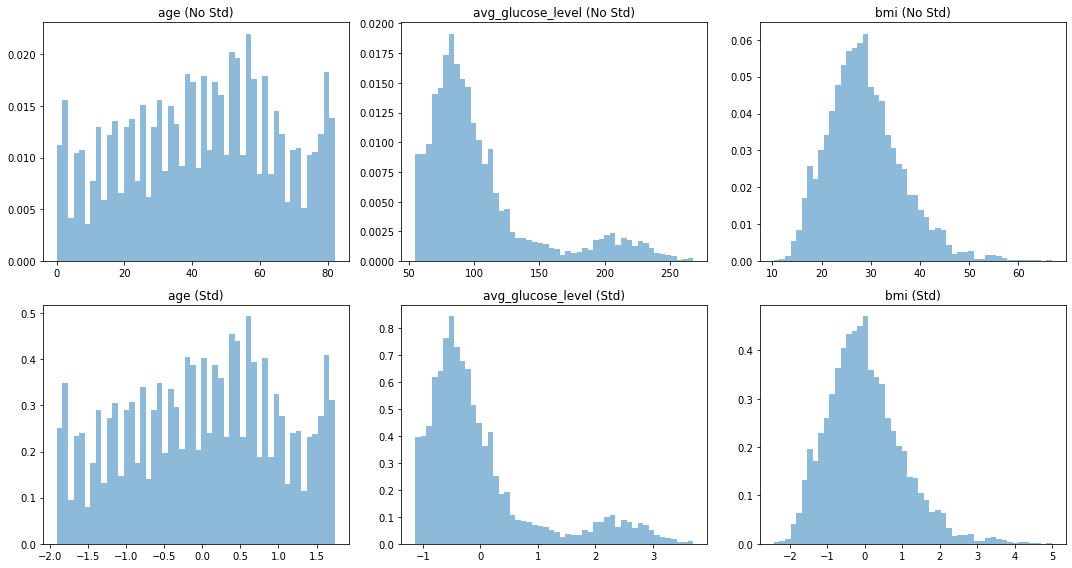

In [34]:
# Scaling and Encoding

# Standardization
scaler = StandardScaler()
# create copies of the data to avoid inplace operations
X_train_scaled, X_test_scaled = X_train.copy(), X_test.copy()

X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

# compare the three features before and after standardization
first_3_features = X_train[num_cols].iloc[:, :3].values
first_3_features_scaled = X_train_scaled[num_cols].iloc[:, :3].values
first_3_feature_names = num_cols[:3]

fig, axes = plt.subplots(2, 3, figsize=(15, 8))

for i, feature_name in enumerate(first_3_feature_names):
    # Without standardization
    axes[0, i].hist(first_3_features[:, i], bins=50, density=True, alpha=0.5)
    axes[0, i].set_title("{} (No Std)".format(feature_name))

    # With standardization
    axes[1, i].hist(first_3_features_scaled[:, i], bins=50, density=True, alpha=0.5)
    axes[1, i].set_title("{} (Std)".format(feature_name))

plt.tight_layout()
plt.show()

Tutorial 8

In [35]:
# the data is devided into features which influence the label (stroke). 
# As the label is a categorical variable (0,1) logistic regression is applied

# Train the model, set the random_state to 42
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty='none', random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

# print(y_pred_log_reg)
# Wie kann ich hier eine Tabelle mit 0 und 1 machen für die Vorhersagen? Was ist hier falsch?

In [36]:
# evaluation metrics of a binary classifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

accuracy = accuracy_score(y_test, y_pred_log_reg)
precision = precision_score(y_test, y_pred_log_reg)
recall = recall_score(y_test, y_pred_log_reg)
f1 = f1_score(y_test, y_pred_log_reg)

print("Performance of the logistic regression model:")
print(
    "Accuracy: {:.3f}; Precision: {:.3f}; Recall: {:.3f}; F1 score: {:.3f}".format(
        accuracy, precision, recall, f1
    )
)

Performance of the logistic regression model:
Accuracy: 0.946; Precision: 0.000; Recall: 0.000; F1 score: 0.000


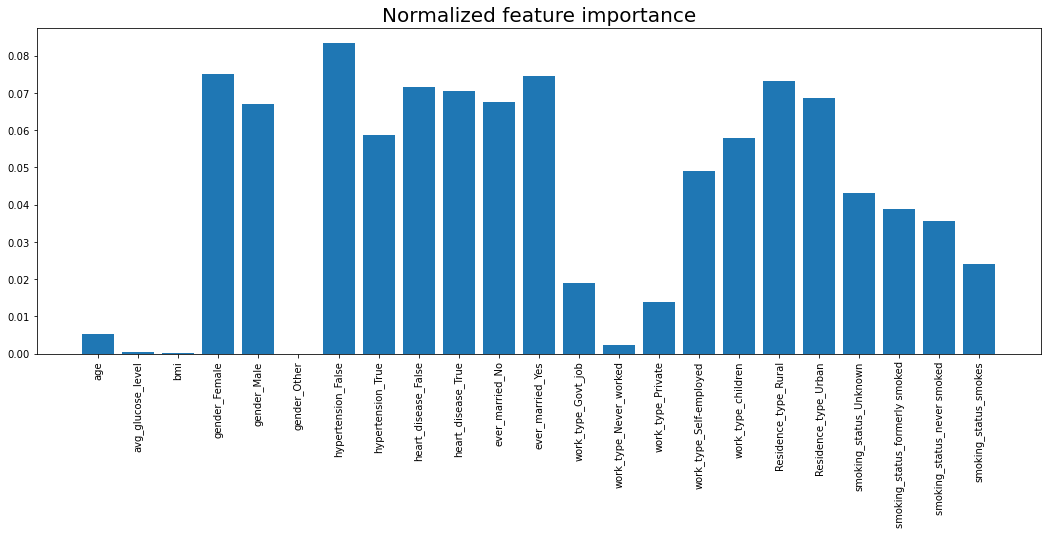

In [37]:
# feature importance of logistic regression
coefficients = log_reg.coef_
importance = np.abs(coefficients)
# Normalize the absolute coefficients to obtain feature importance scores
importance_scores = (importance / np.sum(importance)).flatten()

fig, ax = plt.subplots(figsize=(18, 6))
ax.bar(np.arange(len(importance_scores)), importance_scores)
ax.set_xticks(
    np.arange(len(importance_scores)), X.columns.tolist(), rotation=90
)  # set the xticks according to the feature names, and rotate them by 90 degrees
ax.set_title("Normalized feature importance", fontsize=20)
plt.show()

In [38]:
# Evaluation of logistric regression with 5-fold cross validation

# Initialize a 5 fold cross-validator and model, set the random_state to 42
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Initialize the model
log_reg = LogisticRegression(random_state=42)

# Metrics to store the results
metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

all_importance = pd.DataFrame(index=range(1, 6), columns=X.columns)
# Evaluate the model using 5-fold cross-validation

fold = 1
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Standardize the data
    X_train_std = scaler.fit_transform(X_train)
    X_test_std = scaler.transform(X_test)

    # Train and predict
    log_reg.fit(X_train_std, y_train)
    y_pred = log_reg.predict(X_test_std)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store the metrics
    metrics['accuracy'].append(accuracy)
    metrics['precision'].append(precision)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)
    
    # Calculate feature importance
    coefficients = log_reg.coef_
    importance = np.abs(coefficients)
    importance_scores = (importance / np.sum(importance)).flatten()
    all_importance.loc[fold] = importance_scores
    
    fold += 1

# Calculate mean and std of the metrics
mean_metrics = {key: np.mean(values) for key, values in metrics.items()}
std_metrics = {key: np.std(values) for key, values in metrics.items()}

# Print mean and std
for key, value in mean_metrics.items():
    print('{}: {:.3f} ± {:.3f}'.format(key.capitalize(), value, std_metrics[key]))


Accuracy: 0.958 ± 0.001
Precision: 0.200 ± 0.400
Recall: 0.005 ± 0.010
F1: 0.010 ± 0.019


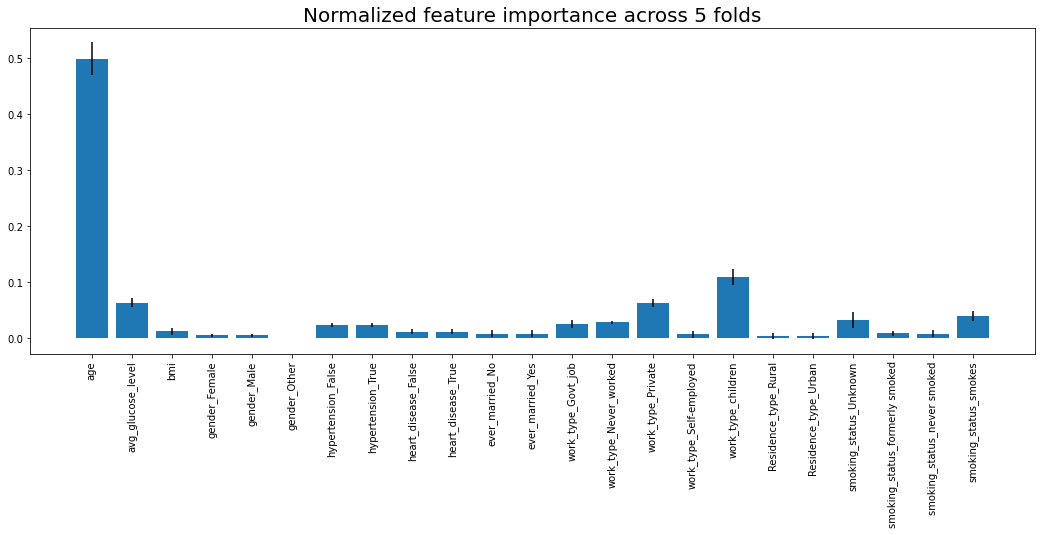

In [39]:
# Visualize the normalized feature importance across the five folds and add error bar to indicate the std
fig, ax = plt.subplots(figsize=(18, 6))
ax.bar(np.arange(importance_scores.shape[0]), all_importance.mean(), yerr=all_importance.std())
ax.set_xticks(np.arange(importance_scores.shape[0]), X.columns.tolist(), rotation=90)
ax.set_title("Normalized feature importance across 5 folds", fontsize=20)
plt.show()

# Output nochmals anschauen, macht für mich irgendwie nicht so viel sinn??

Tutorial 9

In [40]:
# (+HW05)

Tutorial 10

In [128]:
# eingefügt sodass gleich versuch 
data = pd.read_csv("../stroke_dataset/healthcare-dataset-stroke-data.csv", index_col=0)
data.isna().sum()
data = data.dropna()

# Remove data with missing entries (same as done above already)
data = data.dropna()
other_indices = data[data['gender'] == 'Other'].index.tolist()
data = data.drop(other_indices, axis=0)
data.dropna(axis='index', subset=['bmi'], inplace=True) #axis='index' -> rows containing missing values in the specified subset should be dropped
filtered_data_bmi_f = data[(data['stroke'] == False) & (data['bmi'] >70)]
filtered_ids_bmi_f = filtered_data_bmi_f.index.tolist()
data = data.drop(filtered_ids_bmi_f, axis=0)
filtered_data_bmi_t = data[(data['stroke'] == True) & (data['bmi'] >50)]
filtered_ids_bmi_t = filtered_data_bmi_t.index.tolist()
data = data.drop(filtered_ids_bmi_t, axis=0)
filtered_data_age = data[(data['stroke'] == True) & (data['age'] < 30)]
filtered_ids_age = filtered_data_age.index.tolist()
data = data.drop(filtered_ids_age, axis=0)

In [129]:

#num_columns = ['age','avg_glucose_level','bmi'] ##'avg_glucose_level' funktioniert nicht, idk why
num_columns = ['age','bmi']
cat_columns = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']
data[cat_columns] = data[cat_columns].astype('category')

In [130]:
#features we want to analyze, for now this two

X = data[['age','bmi']]
y = data['stroke']

# Check positive class prevalence meaning the frequency of stroke (prevalence of stroke = 1 ->positive vs. 0)
y.mean()
y.sum()
print('Data set comprises {:.0f} positive instances, implying a positive class prevalence of {:.3f}'.format(y.sum(), y.mean()))


Data set comprises 207 positive instances, implying a positive class prevalence of 0.042


In [131]:
# eingefügt sodass gleich versuch

# Split the dataset into training and testing sets, 80% for training and 20% for testing, set the random seed to 2023.
# Use a stratified split to account for class imbalance in outcome!
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2023,stratify=y)
# Standardize the numerical features using training set statistics
sc = StandardScaler()
X_train[num_columns] = sc.fit_transform(X_train[num_columns])
X_test[num_columns]  = sc.transform(X_test[num_columns])


In [132]:
# Fit and make predictions with different models:
clf_SVM = svm.SVC(probability=True, kernel = 'linear')
clf_SVM.fit(X_train, y_train)
# SVC is a classification algorithm (handles linearly and non-linearly separable data) 
#It is a variant of Support Vector Machines (SVM) specifically designed for classification.
#It finds the best decision boundary by maximizing the margin and utilizes support vectors to define the decision boundary.

clf_LR = LogisticRegression(random_state=1)
clf_LR.fit(X_train, y_train)
#Logistic Regression is ideal to evaluate when using non-linear data
clf_RF = RandomForestClassifier(random_state=1)
clf_RF.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [133]:
#in this part we want to assess the classifiers performance 
# since we are dealing with an unbalanced dataset - the accurracy is not meaningful - rather we want to look at the precision

def eval_Performance(y_eval, X_eval, clf, clf_name = 'My Classifier'):

    y_pred = clf.predict(X_eval)
    y_pred_proba = clf.predict_proba(X_eval)[:, 1]
    tn, fp, fn, tp = confusion_matrix(y_eval, y_pred).ravel()


    # evaluation
    precision = precision_score(y_eval, y_pred)
    recall    = recall_score(y_eval, y_pred)
    f1        = f1_score(y_eval, y_pred)
    accuracy  = accuracy_score(y_eval, y_pred)
    fp_rates, tp_rates, _ = roc_curve(y_eval, y_pred_proba)

    # Calculate the area under the roc curve using sklearn function
    roc_auc = auc(fp_rates, tp_rates)

    return tp,fp,tn,fn,accuracy, precision, recall, f1, roc_auc


In [134]:
# Evaluates precision, ROC AUC and more 
#ROC AUC (Area Under the Receiver Operating Characteristic Curve) used for performance metric for binary classification. 
#It quantifies the model's ability to distinguish between the positive and negative classes by plotting the true positive rate against the false positive rate at various classification thresholds. 
#The area under the ROC curve provides an aggregate measure of the classifier's performance, where a higher value indicates better discrimination between the classes.

df_performance = pd.DataFrame(columns = ['tp','fp','tn','fn','accuracy', 'precision', 'recall', 'f1', 'roc_auc'] )
df_performance.loc['SVM (test)',:] = eval_Performance(y_test, X_test, clf_SVM, clf_name = 'SVM')
df_performance.loc['SVM (train)',:] = eval_Performance(y_train, X_train, clf_SVM, clf_name = 'SVM (train')

df_performance.loc['LR (test)',:] = eval_Performance(y_test, X_test, clf_LR, clf_name = 'LR')
df_performance.loc['LR (train)',:] = eval_Performance(y_train, X_train, clf_LR, clf_name = 'LR (train)')

df_performance.loc['RF (test)',:] = eval_Performance(y_test, X_test, clf_RF, clf_name = 'RF')
df_performance.loc['RF (train)',:] = eval_Performance(y_train, X_train, clf_RF, clf_name = 'RF (train)')

df_performance

,tp,fp,tn,fn,accuracy,precision,recall,f1,roc_auc
SVM (test),0,0,940,41,0.958206,0.0,0.0,0.0,0.805514
SVM (train),0,0,3755,166,0.957664,0.0,0.0,0.0,0.815416
LR (test),0,0,940,41,0.958206,0.0,0.0,0.0,0.837688
LR (train),0,0,3755,166,0.957664,0.0,0.0,0.0,0.841959
RF (test),2,18,922,39,0.941896,0.1,0.04878,0.065574,0.702037
RF (train),136,4,3751,30,0.991329,0.971429,0.819277,0.888889,0.999022


In [135]:
# we wont look at acurracy, since we have unbalanced data this value is not significant to evaluate our classifiers performance 
# precision is important - for now it seems to be too low
# when looking at the roc_auc we notice all models seem to be overfitting, tp and fp are not identified
# a solution to make tis better is sampling up / down in order to avoid the imbalance we have in our data 

In [136]:
# Fit and make predictions for a balanced subset of the data
pats_pos = list(np.random.choice(X_train[y_train == 1].index,400))
pats_neg = list(np.random.choice(X_train[y_train == 0].index,400))
X_train_sub = X_train.loc[pats_pos+pats_neg]
y_train_sub = y_train.loc[pats_pos+pats_neg]

pats_pos_test = list(X_test[y_test == 1].index)
pats_neg_test = list(np.random.choice(X_test[y_test == 0].index,len(pats_pos_test)))
X_test_sub = X_test.loc[pats_pos_test+pats_neg_test]
y_test_sub = y_test.loc[pats_pos_test+pats_neg_test]

# Fit models
#kernel set to "linear" assumes aur data zB age vs bmi is separated linearly. 
#but above in our data plots we see that there is no linear relationchip between age and bmi so this feature will not give us desired results
clf_SVM_sub = svm.SVC(probability=True, kernel = 'linear')
clf_SVM_sub.fit(X_train_sub, y_train_sub)

#class weight = balanced, deals the unbalance in our data which is desired:)
clf_LR_bal = LogisticRegression(random_state=1, class_weight='balanced')
clf_LR_bal.fit(X_train, y_train)
clf_RF_bal = RandomForestClassifier(random_state=1, class_weight='balanced')
clf_RF_bal.fit(X_train, y_train)

# Evaluate
df_performance.loc['SVM (train, bal. subset)',:] = eval_Performance(y_train_sub, X_train_sub, clf_SVM_sub, clf_name = 'SVM (train, sub')
df_performance.loc['SVM (test,bal. subset)',:] = eval_Performance(y_test_sub, X_test_sub, clf_SVM_sub, clf_name = 'SVM (test, sub')

df_performance.loc['LR (test,bal)',:] = eval_Performance(y_test, X_test, clf_LR_bal, clf_name = 'LR_bal')
df_performance.loc['LR (train,bal)',:] = eval_Performance(y_train, X_train, clf_LR_bal, clf_name = 'LR_bal (train)')
df_performance.loc['RF (test,bal)',:] = eval_Performance(y_test, X_test, clf_RF_bal, clf_name = 'RF_bal')
df_performance.loc['RF (train,bal)',:] = eval_Performance(y_train, X_train, clf_RF_bal, clf_name = 'RF_bal (train)')

df_performance

,tp,fp,tn,fn,accuracy,precision,recall,f1,roc_auc
SVM (test),0,0,940,41,0.958206,0.0,0.0,0.0,0.805514
SVM (train),0,0,3755,166,0.957664,0.0,0.0,0.0,0.815416
LR (test),0,0,940,41,0.958206,0.0,0.0,0.0,0.837688
LR (train),0,0,3755,166,0.957664,0.0,0.0,0.0,0.841959
RF (test),2,18,922,39,0.941896,0.1,0.04878,0.065574,0.702037
RF (train),136,4,3751,30,0.991329,0.971429,0.819277,0.888889,0.999022
"SVM (train, bal. subset)",328,111,289,72,0.77125,0.747153,0.82,0.781883,0.840416
"SVM (test,bal. subset)",33,10,31,8,0.780488,0.767442,0.804878,0.785714,0.856633
"LR (test,bal)",32,255,685,9,0.730887,0.111498,0.780488,0.195122,0.83678
"LR (train,bal)",133,1051,2704,33,0.72354,0.112331,0.801205,0.197037,0.84174


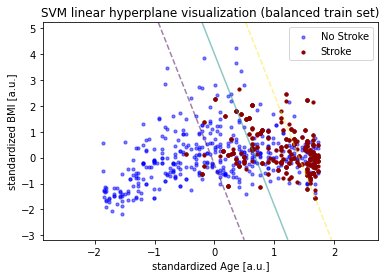

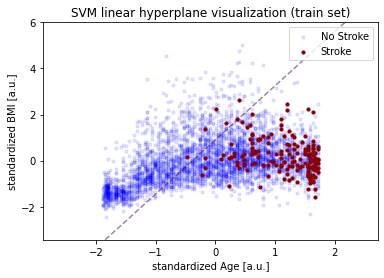

In [137]:
# when looking at the roc_auc of the last 6 entries: still overfitting, percision is bad for LR and RF
# our precision is not really getting better...

# Visualize the results
from sklearn.inspection import DecisionBoundaryDisplay
plt.figure()
plt.scatter(X_train_sub.loc[y_train_sub==0,'age'], X_train_sub.loc[y_train_sub==0,'bmi'],s =10,color = 'blue',alpha = 0.5, label = 'No Stroke')
plt.scatter(X_train_sub.loc[y_train_sub==1,'age'], X_train_sub.loc[y_train_sub==1,'bmi'],s =10,color = 'darkred', label = 'Stroke')

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf_SVM_sub,
    X_train.loc[pats_pos+pats_neg].values,
    plot_method="contour",
    levels=[-1, 0, 1],
    color = 'k',
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax
)
plt.xlabel('standardized Age [a.u.]')
plt.ylabel('standardized BMI [a.u.]')
plt.title('SVM linear hyperplane visualization (balanced train set)')
plt.legend()


# For the imbalanced data set
plt.figure()
plt.scatter(X_train.loc[y_train==0,'age'], X_train.loc[y_train==0,'bmi'],s =10,color = 'blue',alpha = 0.1, label = 'No Stroke')
plt.scatter(X_train.loc[y_train==1,'age'], X_train.loc[y_train==1,'bmi'],s =10,color = 'darkred', label = 'Stroke')

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf_SVM,
    X_train.values,
    plot_method="contour",
    levels=[-1, 0, 1],
    color = 'k',
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax
)
plt.xlabel('standardized Age [a.u.]')
plt.ylabel('standardized BMI [a.u.]')
plt.title('SVM linear hyperplane visualization (train set)')
plt.legend()

In [119]:
# now we will do the same with other parameters
#features we want to analyze, for now 'hypertension' and 'heart_disease'

X = data[['hypertension','heart_disease']]
y = data['stroke']

# Check positive class prevalence meaning the frequency of stroke (prevalence of stroke = 1 ->positive vs. 0)
y.mean()
y.sum()
print('Data set comprises {:.0f} positive instances, implying a positive class prevalence of {:.3f}'.format(y.sum(), y.mean()))

#in this part we want to assess the classifiers performance 
# since we are dealing with an unbalanced dataset - the accurracy is not meaningful - rather we want to look at the precision

def eval_Performance(y_eval, X_eval, clf, clf_name = 'My Classifier'):

    y_pred = clf.predict(X_eval)
    y_pred_proba = clf.predict_proba(X_eval)[:, 1]
    tn, fp, fn, tp = confusion_matrix(y_eval, y_pred).ravel()


    # evaluation
    precision = precision_score(y_eval, y_pred)
    recall    = recall_score(y_eval, y_pred)
    f1        = f1_score(y_eval, y_pred)
    accuracy  = accuracy_score(y_eval, y_pred)
    fp_rates, tp_rates, _ = roc_curve(y_eval, y_pred_proba)

    # Calculate the area under the roc curve using sklearn function
    roc_auc = auc(fp_rates, tp_rates)

    return tp,fp,tn,fn,accuracy, precision, recall, f1, roc_auc

# Evaluates precision, ROC AUC and more 
#ROC AUC (Area Under the Receiver Operating Characteristic Curve) used for performance metric for binary classification. 
#It quantifies the model's ability to distinguish between the positive and negative classes by plotting the true positive rate against the false positive rate at various classification thresholds. 
#The area under the ROC curve provides an aggregate measure of the classifier's performance, where a higher value indicates better discrimination between the classes.

df_performance = pd.DataFrame(columns = ['tp','fp','tn','fn','accuracy', 'precision', 'recall', 'f1', 'roc_auc'] )
df_performance.loc['SVM (test)',:] = eval_Performance(y_test, X_test, clf_SVM, clf_name = 'SVM')
df_performance.loc['SVM (train)',:] = eval_Performance(y_train, X_train, clf_SVM, clf_name = 'SVM (train')

df_performance.loc['LR (test)',:] = eval_Performance(y_test, X_test, clf_LR, clf_name = 'LR')
df_performance.loc['LR (train)',:] = eval_Performance(y_train, X_train, clf_LR, clf_name = 'LR (train)')

df_performance.loc['RF (test)',:] = eval_Performance(y_test, X_test, clf_RF, clf_name = 'RF')
df_performance.loc['RF (train)',:] = eval_Performance(y_train, X_train, clf_RF, clf_name = 'RF (train)')

# Fit and make predictions for a balanced subset of the data
pats_pos = list(np.random.choice(X_train[y_train == 1].index,400))
pats_neg = list(np.random.choice(X_train[y_train == 0].index,400))
X_train_sub = X_train.loc[pats_pos+pats_neg]
y_train_sub = y_train.loc[pats_pos+pats_neg]

pats_pos_test = list(X_test[y_test == 1].index)
pats_neg_test = list(np.random.choice(X_test[y_test == 0].index,len(pats_pos_test)))
X_test_sub = X_test.loc[pats_pos_test+pats_neg_test]
y_test_sub = y_test.loc[pats_pos_test+pats_neg_test]

# Fit models
#kernel set to "linear" assumes aur data zB age vs bmi is separated linearly. 
#but above in our data plots we see that there is no linear relationchip between age and bmi so this feature will not give us desired results
clf_SVM_sub = svm.SVC(probability=True, kernel = 'linear')
clf_SVM_sub.fit(X_train_sub, y_train_sub)

#class weight = balanced, deals the unbalance in our data which is desired:)
clf_LR_bal = LogisticRegression(random_state=1, class_weight='balanced')
clf_LR_bal.fit(X_train, y_train)
clf_RF_bal = RandomForestClassifier(random_state=1, class_weight='balanced')
clf_RF_bal.fit(X_train, y_train)

# Evaluate
df_performance.loc['SVM (train, bal. subset)',:] = eval_Performance(y_train_sub, X_train_sub, clf_SVM_sub, clf_name = 'SVM (train, sub')
df_performance.loc['SVM (test,bal. subset)',:] = eval_Performance(y_test_sub, X_test_sub, clf_SVM_sub, clf_name = 'SVM (test, sub')

df_performance.loc['LR (test,bal)',:] = eval_Performance(y_test, X_test, clf_LR_bal, clf_name = 'LR_bal')
df_performance.loc['LR (train,bal)',:] = eval_Performance(y_train, X_train, clf_LR_bal, clf_name = 'LR_bal (train)')
df_performance.loc['RF (test,bal)',:] = eval_Performance(y_test, X_test, clf_RF_bal, clf_name = 'RF_bal')
df_performance.loc['RF (train,bal)',:] = eval_Performance(y_train, X_train, clf_RF_bal, clf_name = 'RF_bal (train)')

df_performance


Data set comprises 207 positive instances, implying a positive class prevalence of 0.042


,tp,fp,tn,fn,accuracy,precision,recall,f1,roc_auc
SVM (test),0,0,940,41,0.958206,0.0,0.0,0.0,0.194486
SVM (train),0,0,3755,166,0.957664,0.0,0.0,0.0,0.184584
LR (test),0,0,940,41,0.958206,0.0,0.0,0.0,0.837688
LR (train),0,0,3755,166,0.957664,0.0,0.0,0.0,0.841959
RF (test),2,18,922,39,0.941896,0.1,0.04878,0.065574,0.702037
RF (train),136,4,3751,30,0.991329,0.971429,0.819277,0.888889,0.999022
"SVM (train, bal. subset)",336,123,277,64,0.76625,0.732026,0.84,0.782305,0.823209
"SVM (test,bal. subset)",33,16,25,8,0.707317,0.673469,0.804878,0.733333,0.785842
"LR (test,bal)",32,255,685,9,0.730887,0.111498,0.780488,0.195122,0.83678
"LR (train,bal)",133,1051,2704,33,0.72354,0.112331,0.801205,0.197037,0.84174


In [121]:
"""
# Visualize the results of hypertension' and 'heart_disease'
from sklearn.inspection import DecisionBoundaryDisplay
plt.figure()
plt.scatter(X_train_sub.loc[y_train_sub==0,'hypertension'], X_train_sub.loc[y_train_sub==0,'heart_disease'],s =10,color = 'blue',alpha = 0.5, label = 'No Stroke')
plt.scatter(X_train_sub.loc[y_train_sub==1,'hypertension'], X_train_sub.loc[y_train_sub==1,'heart_disease'],s =10,color = 'darkred', label = 'Stroke')

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf_SVM_sub,
    X_train.loc[pats_pos+pats_neg].values,
    plot_method="contour",
    levels=[-1, 0, 1],
    color = 'k',
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax
)
plt.xlabel('standardized hypertension [a.u.]')
plt.ylabel('standardized heart_disease [a.u.]')
plt.title('SVM linear hyperplane visualization (balanced train set)')
plt.legend()


# For the imbalanced data set
plt.figure()
plt.scatter(X_train.loc[y_train==0,'hypertension'], X_train.loc[y_train==0,'heart_disease'],s =10,color = 'blue',alpha = 0.1, label = 'No Stroke')
plt.scatter(X_train.loc[y_train==1,'hypertension'], X_train.loc[y_train==1,'heart_disease'],s =10,color = 'darkred', label = 'Stroke')

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf_SVM,
    X_train.values,
    plot_method="contour",
    levels=[-1, 0, 1],
    color = 'k',
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax
)
plt.xlabel('standardized hypertension [a.u.]')
plt.ylabel('standardized heart_disease [a.u.]')
plt.title('SVM linear hyperplane visualization (train set)')
plt.legend()
"""

'\n# Visualize the results of hypertension\' and \'heart_disease\'\nfrom sklearn.inspection import DecisionBoundaryDisplay\nplt.figure()\nplt.scatter(X_train_sub.loc[y_train_sub==0,\'hypertension\'], X_train_sub.loc[y_train_sub==0,\'heart_disease\'],s =10,color = \'blue\',alpha = 0.5, label = \'No Stroke\')\nplt.scatter(X_train_sub.loc[y_train_sub==1,\'hypertension\'], X_train_sub.loc[y_train_sub==1,\'heart_disease\'],s =10,color = \'darkred\', label = \'Stroke\')\n\n# plot the decision function\nax = plt.gca()\nDecisionBoundaryDisplay.from_estimator(\n    clf_SVM_sub,\n    X_train.loc[pats_pos+pats_neg].values,\n    plot_method="contour",\n    levels=[-1, 0, 1],\n    color = \'k\',\n    alpha=0.5,\n    linestyles=["--", "-", "--"],\n    ax=ax\n)\nplt.xlabel(\'standardized hypertension [a.u.]\')\nplt.ylabel(\'standardized heart_disease [a.u.]\')\nplt.title(\'SVM linear hyperplane visualization (balanced train set)\')\nplt.legend()\n\n\n# For the imbalanced data set\nplt.figure()\nplt.s

In [125]:

#features we want to analyze, for now 'smoking_status','heart_disease'

X = data[['smoking_status','heart_disease']]
y = data['stroke']

# Check positive class prevalence meaning the frequency of stroke (prevalence of stroke = 1 ->positive vs. 0)
y.mean()
y.sum()
print('Data set comprises {:.0f} positive instances, implying a positive class prevalence of {:.3f}'.format(y.sum(), y.mean()))

#in this part we want to assess the classifiers performance 
# since we are dealing with an unbalanced dataset - the accurracy is not meaningful - rather we want to look at the precision

def eval_Performance(y_eval, X_eval, clf, clf_name = 'My Classifier'):

    y_pred = clf.predict(X_eval)
    y_pred_proba = clf.predict_proba(X_eval)[:, 1]
    tn, fp, fn, tp = confusion_matrix(y_eval, y_pred).ravel()


    # evaluation
    precision = precision_score(y_eval, y_pred)
    recall    = recall_score(y_eval, y_pred)
    f1        = f1_score(y_eval, y_pred)
    accuracy  = accuracy_score(y_eval, y_pred)
    fp_rates, tp_rates, _ = roc_curve(y_eval, y_pred_proba)

    # Calculate the area under the roc curve using sklearn function
    roc_auc = auc(fp_rates, tp_rates)

    return tp,fp,tn,fn,accuracy, precision, recall, f1, roc_auc

# Evaluates precision, ROC AUC and more 
#ROC AUC (Area Under the Receiver Operating Characteristic Curve) used for performance metric for binary classification. 
#It quantifies the model's ability to distinguish between the positive and negative classes by plotting the true positive rate against the false positive rate at various classification thresholds. 
#The area under the ROC curve provides an aggregate measure of the classifier's performance, where a higher value indicates better discrimination between the classes.

df_performance = pd.DataFrame(columns = ['tp','fp','tn','fn','accuracy', 'precision', 'recall', 'f1', 'roc_auc'] )
df_performance.loc['SVM (test)',:] = eval_Performance(y_test, X_test, clf_SVM, clf_name = 'SVM')
df_performance.loc['SVM (train)',:] = eval_Performance(y_train, X_train, clf_SVM, clf_name = 'SVM (train')

df_performance.loc['LR (test)',:] = eval_Performance(y_test, X_test, clf_LR, clf_name = 'LR')
df_performance.loc['LR (train)',:] = eval_Performance(y_train, X_train, clf_LR, clf_name = 'LR (train)')

df_performance.loc['RF (test)',:] = eval_Performance(y_test, X_test, clf_RF, clf_name = 'RF')
df_performance.loc['RF (train)',:] = eval_Performance(y_train, X_train, clf_RF, clf_name = 'RF (train)')

# Fit and make predictions for a balanced subset of the data
pats_pos = list(np.random.choice(X_train[y_train == 1].index,400))
pats_neg = list(np.random.choice(X_train[y_train == 0].index,400))
X_train_sub = X_train.loc[pats_pos+pats_neg]
y_train_sub = y_train.loc[pats_pos+pats_neg]

pats_pos_test = list(X_test[y_test == 1].index)
pats_neg_test = list(np.random.choice(X_test[y_test == 0].index,len(pats_pos_test)))
X_test_sub = X_test.loc[pats_pos_test+pats_neg_test]
y_test_sub = y_test.loc[pats_pos_test+pats_neg_test]

# Fit models
#kernel set to "linear" assumes aur data zB age vs bmi is separated linearly. 
#but above in our data plots we see that there is no linear relationchip between age and bmi so this feature will not give us desired results
clf_SVM_sub = svm.SVC(probability=True, kernel = 'linear')
clf_SVM_sub.fit(X_train_sub, y_train_sub)

#class weight = balanced, deals the unbalance in our data which is desired:)
clf_LR_bal = LogisticRegression(random_state=1, class_weight='balanced')
clf_LR_bal.fit(X_train, y_train)
clf_RF_bal = RandomForestClassifier(random_state=1, class_weight='balanced')
clf_RF_bal.fit(X_train, y_train)

# Evaluate
df_performance.loc['SVM (train, bal. subset)',:] = eval_Performance(y_train_sub, X_train_sub, clf_SVM_sub, clf_name = 'SVM (train, sub')
df_performance.loc['SVM (test,bal. subset)',:] = eval_Performance(y_test_sub, X_test_sub, clf_SVM_sub, clf_name = 'SVM (test, sub')

df_performance.loc['LR (test,bal)',:] = eval_Performance(y_test, X_test, clf_LR_bal, clf_name = 'LR_bal')
df_performance.loc['LR (train,bal)',:] = eval_Performance(y_train, X_train, clf_LR_bal, clf_name = 'LR_bal (train)')
df_performance.loc['RF (test,bal)',:] = eval_Performance(y_test, X_test, clf_RF_bal, clf_name = 'RF_bal')
df_performance.loc['RF (train,bal)',:] = eval_Performance(y_train, X_train, clf_RF_bal, clf_name = 'RF_bal (train)')

df_performance


Data set comprises 207 positive instances, implying a positive class prevalence of 0.042


,tp,fp,tn,fn,accuracy,precision,recall,f1,roc_auc
SVM (test),0,0,940,41,0.958206,0.0,0.0,0.0,0.194486
SVM (train),0,0,3755,166,0.957664,0.0,0.0,0.0,0.184584
LR (test),0,0,940,41,0.958206,0.0,0.0,0.0,0.837688
LR (train),0,0,3755,166,0.957664,0.0,0.0,0.0,0.841959
RF (test),2,18,922,39,0.941896,0.1,0.04878,0.065574,0.702037
RF (train),136,4,3751,30,0.991329,0.971429,0.819277,0.888889,0.999022
"SVM (train, bal. subset)",327,111,289,73,0.77,0.746575,0.8175,0.78043,0.844653
"SVM (test,bal. subset)",33,10,31,8,0.780488,0.767442,0.804878,0.785714,0.882808
"LR (test,bal)",32,255,685,9,0.730887,0.111498,0.780488,0.195122,0.83678
"LR (train,bal)",133,1051,2704,33,0.72354,0.112331,0.801205,0.197037,0.84174


In [139]:
#this was also already done above in the tutorial: 
# Lösung könnte sein, den vorherigen teil wo man die verschiedenen machine learning models vergleicht nach oben zu schieben - bevor one-hot encoding gemacht wird, so muss man die daten maybe nicht zwi mal hereinladen und das encoding auch nicht zwei mal machen

# Note that we now use all features of the dataset.
# Preprocessing: one-hot encode categorical features, split data (train/test), standardise numerical features
data_encoded = pd.get_dummies(data, columns=cat_columns, drop_first=True)
X = data_encoded.drop('stroke',axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023,stratify=y)

num_columns = ['age','bmi','avg_glucose_level']
sc = StandardScaler()
X_train[num_columns] = sc.fit_transform(X_train[num_columns])
X_test[num_columns]  = sc.transform(X_test[num_columns])

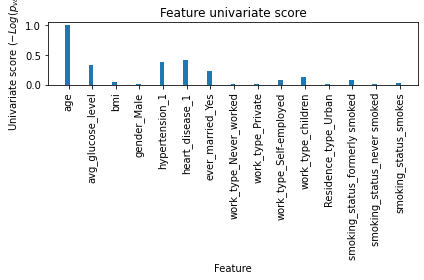

In [141]:
# Use univariate FS
# f_classif: a scoring function that returns univariate scores and p-values based on an F-Test
# The scoring function has to be selected depending on the task (regression/classification).
# For classification, scikit-learn provides: chi2, f_classif, mutual_info_classif
UVFS_Selector = SelectKBest(f_classif, k=4) # Select top 4 features - SelectKBest removes all but the k highest scoring features
X_UVFS = UVFS_Selector.fit_transform(X_train, y_train) # ...but only on training data.
X_UVFS_test = UVFS_Selector.transform(X_test)
scores = -np.log10(UVFS_Selector.pvalues_)
scores /= scores.max()

# Plot 
X_indices = np.arange(X.shape[-1])
plt.figure()
plt.clf()
plt.bar(X_indices - 0.05, scores, width=0.2)
plt.title("Feature univariate score")
plt.xlabel("Feature")
plt.ylabel(r"Univariate score ($-Log(p_{value})$)")
plt.xticks(X_indices, X.columns, rotation = 90)
plt.tight_layout()
plt.show()

In [142]:
UVFS_Selector.get_feature_names_out()

array(['age', 'avg_glucose_level', 'hypertension_1', 'heart_disease_1'],
      dtype=object)

In [143]:
# Evaluate performance using only k top features
clf_LR_bal_FS = LogisticRegression(random_state=1, class_weight='balanced')
clf_LR_bal_FS.fit(X_UVFS, y_train)

# Evaluation of Univariate Feature Selection of Logistic Regression
df_performance.loc['LR (test,bal,UVFS)',:] = eval_Performance(y_test, X_UVFS_test, clf_LR_bal_FS, clf_name = 'LR_bal_UVFS')
df_performance.loc['LR (train,bal,UVFS)',:] = eval_Performance(y_train, X_UVFS, clf_LR_bal_FS, clf_name = 'LR_bal_UVFS (train)')
df_performance

,tp,fp,tn,fn,accuracy,precision,recall,f1,roc_auc
SVM (test),0,0,940,41,0.958206,0.0,0.0,0.0,0.805514
SVM (train),0,0,3755,166,0.957664,0.0,0.0,0.0,0.815416
LR (test),0,0,940,41,0.958206,0.0,0.0,0.0,0.837688
LR (train),0,0,3755,166,0.957664,0.0,0.0,0.0,0.841959
RF (test),2,18,922,39,0.941896,0.1,0.04878,0.065574,0.702037
RF (train),136,4,3751,30,0.991329,0.971429,0.819277,0.888889,0.999022
"SVM (train, bal. subset)",328,111,289,72,0.77125,0.747153,0.82,0.781883,0.840416
"SVM (test,bal. subset)",33,10,31,8,0.780488,0.767442,0.804878,0.785714,0.856633
"LR (test,bal)",32,255,685,9,0.730887,0.111498,0.780488,0.195122,0.83678
"LR (train,bal)",133,1051,2704,33,0.72354,0.112331,0.801205,0.197037,0.84174


In [144]:
# Use L1 regualarization in a logistic regression classifier to select features.
sel_ = SelectFromModel(
    LogisticRegression(C=0.5, penalty='l1', solver='liblinear', random_state=10)
)
sel_.fit(X_train, y_train)

# features with non-zero coefficients are "support":
X.columns[sel_.get_support()]
X_train_L1 = X_train.iloc[:,sel_.get_support()]
X_test_L1 = X_test.iloc[:,sel_.get_support()]

# Evaluate performance on subset of features
clf_LR_bal_L1 = LogisticRegression(random_state=1, class_weight='balanced')
clf_LR_bal_L1.fit(X_train_L1, y_train)

# Evaluation
df_performance.loc['LR (test,bal,L1)',:] = eval_Performance(y_test, X_test_L1, clf_LR_bal_L1, clf_name = 'LR_bal_L1')
df_performance.loc['LR (train,bal,L1)',:] = eval_Performance(y_train, X_train_L1, clf_LR_bal_L1, clf_name = 'LR_bal_L1 (train)')

df_performance

,tp,fp,tn,fn,accuracy,precision,recall,f1,roc_auc
SVM (test),0,0,940,41,0.958206,0.0,0.0,0.0,0.805514
SVM (train),0,0,3755,166,0.957664,0.0,0.0,0.0,0.815416
LR (test),0,0,940,41,0.958206,0.0,0.0,0.0,0.837688
LR (train),0,0,3755,166,0.957664,0.0,0.0,0.0,0.841959
RF (test),2,18,922,39,0.941896,0.1,0.04878,0.065574,0.702037
RF (train),136,4,3751,30,0.991329,0.971429,0.819277,0.888889,0.999022
"SVM (train, bal. subset)",328,111,289,72,0.77125,0.747153,0.82,0.781883,0.840416
"SVM (test,bal. subset)",33,10,31,8,0.780488,0.767442,0.804878,0.785714,0.856633
"LR (test,bal)",32,255,685,9,0.730887,0.111498,0.780488,0.195122,0.83678
"LR (train,bal)",133,1051,2704,33,0.72354,0.112331,0.801205,0.197037,0.84174
